# Лабораторная работа по анализу данных 1

Выполнил **Кипаренко Илья**




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'
data = pd.read_csv('bank-additional-full.csv', sep = ';', engine = 'python')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- `age` (numeric)
- `job` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- `default`: has credit in default? (categorical: 'no','yes','unknown')
- `housing`: has housing loan? (categorical: 'no','yes','unknown')
- `loan`: has personal loan? (categorical: 'no','yes','unknown')
- `contact`: contact communication type (categorical: 'cellular','telephone') 
- `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- `previous`: number of contacts performed before this campaign and for this client (numeric)
- `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- `emp.var.rate`: employment variation rate - quarterly indicator (numeric)
- `cons.price.idx`: consumer price index - monthly indicator (numeric) 
- `cons.conf.idx`: consumer confidence index - monthly indicator (numeric) 
- `euribor3m`: euribor 3 month rate - daily indicator (numeric)
- `nr.employed`: number of employees - quarterly indicator (numeric)
- `y` - has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
print(data.shape)
print(data.columns)
print([data[c].dtype.name for c in data.columns])

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
['int64', 'object', 'object', 'object', 'object', 'object', 'object', 'object', 'object', 'object', 'int64', 'int64', 'int64', 'int64', 'object', 'float64', 'float64', 'float64', 'float64', 'float64', 'object']


In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
corrTable = data.corr()
corrTable

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [7]:
for i in corrTable:
    for j in corrTable[i].index:
        if (i < j) and abs(corrTable[i][j]) > 0.9:
            print(i, j, corrTable[i][j])
        

emp.var.rate euribor3m 0.9722446711515584
emp.var.rate nr.employed 0.9069701012559412
euribor3m nr.employed 0.9451544313983309


Как мы видим три столбца наших данных сильно коррелируют между собой, два из них можно удалить.

In [8]:
data = data.drop(['euribor3m', 'nr.employed'], axis = 1)

In [9]:
data.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


# Готовим данные

In [10]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx']


In [11]:
for name in categorical_columns:
    print(data[name].value_counts(), "\n")

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

cellular     26144
telephone    15044
Name: contact, dtype: int64 

may    13769
jul     717

Как мы видим, классы в наших данных сильно доминированы классом `no`
Это значит что если наш классификатор всегда будет предсказывать `no`  то ошибка составит
4640 / (36548 + 4640) или 0.112. 

In [12]:
4640 / (36548 + 4640)

0.11265417111780131

## Обрабатываем пропущенные значения

В наших данных пропущенными значениями являются `unknown` в некоторых столбцах.

Заменим их на самое популярное значение.

Так как стобец `default` после этой операции станет практически полностью `no` мы его удалим.

Также создатели датасет рекомендуют не пользоваться столбцом `duration` (так как он нечестно получен?)


In [13]:
for name in ['job', 'education', 'marital', 'housing', 'loan']:
    data.loc[data[name] == 'unknown', name] = data[name].describe().top
data = data.drop(['default', 'duration'], axis=1)

categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']

## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [14]:
data_describe = data.describe(include = ['object'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['housing', 'loan', 'contact', 'y'] ['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome']


In [15]:
for name in binary_columns:
    A, B = data[name].unique()
    data.at[data[name] == A, name] = 0
    data.at[data[name] == B, name] = 1

К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `marital` принимает 3 различных значения: 

In [16]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

Заменим признак `marital` 3 признаками: `marital_married`, `marital_single`, `marital_divorced`.


In [17]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [18]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000


In [19]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [20]:
data_numerical.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,-1.009196e-16,-9.591671e-17,-2.842999e-16,6.624464e-17,-4.218210e-13,-8.643368e-11,-2.132652e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.209338e+00,-5.659151e-01,-5.149381e+00,-3.494900e-01,-2.216407e+00,-2.374861e+00,-2.224926e+00
25%,-7.699710e-01,-5.659151e-01,1.954115e-01,-3.494900e-01,-1.197921e+00,-8.649442e-01,-4.747852e-01
50%,-1.942243e-01,-2.049060e-01,1.954115e-01,-3.494900e-01,6.480844e-01,2.994534e-01,-2.803250e-01
75%,6.693957e-01,1.561030e-01,1.954115e-01,-3.494900e-01,8.390505e-01,7.227137e-01,8.864358e-01
max,5.563242e+00,1.928958e+01,1.954115e-01,1.379475e+01,8.390505e-01,2.058143e+00,2.939071e+00


## Соединяем все в одну таблицу

In [21]:
data_cleaned = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data_cleaned.shape)
print(data_cleaned.columns)
data_cleaned.head()

(41188, 50)
Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'housing', 'loan',
       'contact', 'y'],
      dtype='object')


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_admin.,job_blue-collar,job_entrepreneur,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,housing,loan,contact,y
0,1.533016,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.628973,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-0.290182,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,-0.002309,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.533016,-0.565915,0.195412,-0.34949,0.648084,0.722714,0.886436,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [22]:
data_cleaned.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_admin.,job_blue-collar,job_entrepreneur,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,housing,loan,contact,y
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,-1.009196e-16,-9.591671e-17,-2.842999e-16,6.624464e-17,-4.218210e-13,-8.643368e-11,-2.132652e-12,0.261047,0.224677,0.035350,...,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.547878,0.151695,0.634748,0.112654
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.439211,0.417375,0.184665,...,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.497708,0.358729,0.481507,0.316173
min,-2.209338e+00,-5.659151e-01,-5.149381e+00,-3.494900e-01,-2.216407e+00,-2.374861e+00,-2.224926e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.699710e-01,-5.659151e-01,1.954115e-01,-3.494900e-01,-1.197921e+00,-8.649442e-01,-4.747852e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.942243e-01,-2.049060e-01,1.954115e-01,-3.494900e-01,6.480844e-01,2.994534e-01,-2.803250e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,6.693957e-01,1.561030e-01,1.954115e-01,-3.494900e-01,8.390505e-01,7.227137e-01,8.864358e-01,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,5.563242e+00,1.928958e+01,1.954115e-01,1.379475e+01,8.390505e-01,2.058143e+00,2.939071e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
print([data_cleaned[c].dtype.name for c in data_cleaned.columns])

['float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'uint8', 'int64', 'int64', 'int64', 'int64']


In [24]:
numerical_columns

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx']

Попробуем исправить несбалансированность классов с помощью дублирования данных с классом `y` с небольшим шумом.
Так же выделим специальную тестовыю выборку из данных, которых точно не будет в тестовой.

In [25]:
drops = ['month', 'day_of', 'education', 'job', 'marital']
drop_columns = [a for a in data_cleaned.columns if any(d in a for d in drops)]
data_k = data_cleaned.drop(drop_columns, axis=1)

y_data = data_k[data_k['y'] == 1].sample(frac=1.0)
n_data = data_k[data_k['y'] == 0]

secret_test_size = int(0.3 * y_data.shape[0])
secret_test = y_data.iloc[:secret_test_size]
y_data = y_data.iloc[secret_test_size:]

print(y_data.shape, n_data.shape)
n_len, y_len = n_data.shape[0], y_data.shape[0]

np.random.seed(42)
index = np.random.choice(y_len, size = n_len, replace=True)

l_cov = len(numerical_columns)
cov_matrix = np.eye(l_cov) * 0.01
mean_t = np.zeros((l_cov,))
noise = np.random.multivariate_normal(mean_t, cov_matrix, n_len)

l_data = pd.DataFrame(y_data.iloc[index])
l_data.loc[:, numerical_columns] = l_data.loc[:, numerical_columns] + noise
l_data['y'] = 1

data_enchanced = n_data.append(l_data)

d_n = data_enchanced.loc[:, numerical_columns]
data_enchanced.loc[:, numerical_columns] = d_n

print(data_cleaned['y'].sum())
print(data_enchanced['y'].sum())

(3248, 14) (36548, 14)
4640
36548


## Helper functions

In [26]:
from sklearn.model_selection import train_test_split

def split(data, test_size = 0.3, random_state = 42):
    X = data.drop(('y'), axis = 1) # выбрасываем столбец 'y'
    y = data['y']
    
    ans = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print("Train|Test split = ", ans[0].shape[0], ans[1].shape[0])
    return ans

def work(data_splitted, method, n_jobs=-1, **kwargs):
    X_train, X_test, y_train, y_test = data_splitted
    try:
        method_obj = method(n_jobs=n_jobs, **kwargs)
    except:
        method_obj = method(**kwargs) #  если метод не имеет параметра n_jobs
    method_name = str(method_obj).split('(')[0]

    method_obj.fit(X_train, y_train)
    
    y_train_predict = method_obj.predict(X_train)
    y_test_predict = method_obj.predict(X_test)

    err_train = np.mean(y_train != y_train_predict)
    err_test  = np.mean(y_test  != y_test_predict)

    print(method_name, "result error is", err_train, err_test)
    
    return method_obj, (y_train_predict, y_test_predict)

data_s = split(data_cleaned)
data_r = split(data_enchanced)
X_train, X_test, y_train, y_test = data_s
X1_train, X1_test, y1_train, y1_test = data_r

feature_names = X_train.columns
feature_names

Train|Test split =  28831 12357
Train|Test split =  51167 21929


Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'housing', 'loan',
       'contact'],
      dtype='object')

In [27]:
X1_train.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'housing', 'loan',
       'contact'],
      dtype='object')

In [28]:
y1_train.mean(), y1_test.mean(), secret_test['y'].mean()

(0.5011042273340239, 0.49742350312371747, 1.0)

In [105]:
import time
from sklearn.neural_network import MLPClassifier
alpha_arr = np.logspace(-8, -2, 6)
test_err_alpha = []
train_err_alpha = []
best_model_plain = None
best_err = 100
best_alpha = None
X1_train, X1_test, y1_train, y1_test = data_s
for alpha in alpha_arr:
    start = time.time()
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,10), 
                              solver = 'adam', activation = 'logistic', random_state = 42)
    mlp_model.fit(X1_train, y1_train) #logistic

    y_train_pred = mlp_model.predict(X1_train)
    y_test_pred = mlp_model.predict(X1_test)
    err_train = np.mean(y1_train != y_train_pred)
    err_test = np.mean(y1_test != y_test_pred)
    train_err_alpha.append(err_train)
    test_err_alpha.append(err_test)
    
    if err_test < best_err:
        best_alpha = alpha
        best_err = err_test
        best_model_plain = mlp_model
    print("Done alpha {:.4e} time is {:3} errors {:.4} {:.4}".format(alpha, round(time.time() - start), err_train, err_test))

Done alpha 1.0000e-08 time is   6 errors 0.09979 0.1019
Done alpha 1.5849e-07 time is   5 errors 0.09979 0.1019
Done alpha 2.5119e-06 time is   5 errors 0.09979 0.1019
Done alpha 3.9811e-05 time is   5 errors 0.09989 0.102
Done alpha 6.3096e-04 time is   5 errors 0.09955 0.1018
Done alpha 1.0000e-02 time is   6 errors 0.1001 0.1006


In [106]:
print(f"Best alpha {best_alpha} with error {best_err}")

Best alpha 0.01 with error 0.10059075827466213


In [108]:
from sklearn.metrics import confusion_matrix

y_train_pred = best_model_plain.predict(X1_train)
y_test_pred = best_model_plain.predict(X1_test)
err_train = np.mean(y1_train != y_train_pred)
err_test = np.mean(y1_test != y_test_pred)
print("Train/test error", err_train, err_test)

print("Train confuse\n", confusion_matrix(y1_train, y_train_pred))
print("Test confuse\n", confusion_matrix(y1_test, y_test_pred))

Train/test error 0.10006590128680934 0.10059075827466213
Train confuse
 [[25137   443]
 [ 2442   809]]
Test confuse
 [[10778   190]
 [ 1053   336]]


Как мы видим несмотря на низкую ошибку, модель корректно распознаёт класс `y` в одной четверти случаев (809 из 3248) как в тестовой, так и в тренировочной выборке.

In [109]:
import time
from sklearn.neural_network import MLPClassifier
alpha_arr = np.logspace(-8, -2, 6)
test_err_alpha = []
train_err_alpha = []
best_model = None
best_err = 100
best_alpha = None
X1_train, X1_test, y1_train, y1_test = data_r
for alpha in alpha_arr:
    start = time.time()
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,10), 
                              solver = 'adam', activation = 'logistic', random_state = 42)
    mlp_model.fit(X1_train, y1_train) #logistic

    y_train_pred = mlp_model.predict(X1_train)
    y_test_pred = mlp_model.predict(X1_test)
    err_train = np.mean(y1_train != y_train_pred)
    err_test = np.mean(y1_test != y_test_pred)
    train_err_alpha.append(err_train)
    test_err_alpha.append(err_test)
    
    if err_test < best_err:
        best_alpha = alpha
        best_err = err_test
        best_model = mlp_model
    print("Done alpha {:.4e} time is {:3} errors {:.4} {:.4}".format(alpha, round(time.time() - start), err_train, err_test))

c:\users\bmz\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Done alpha 1.0000e-08 time is  52 errors 0.08668 0.0887
Done alpha 1.5849e-07 time is  50 errors 0.08664 0.08865
Done alpha 2.5119e-06 time is  53 errors 0.08574 0.08637
Done alpha 3.9811e-05 time is  55 errors 0.08631 0.08756
Done alpha 6.3096e-04 time is  56 errors 0.08846 0.08924
Done alpha 1.0000e-02 time is  26 errors 0.256 0.2568


In [110]:
print(f"Best alpha {best_alpha} with error {best_err}")

Best alpha 2.5118864315095823e-06 with error 0.08636964749874596


In [111]:
best_model.score(secret_test.drop(('y'), axis = 1), secret_test['y'])

0.5272988505747126

In [114]:
y_train_pred = best_model.predict(X1_train)
y_test_pred = best_model.predict(X1_test)
err_train = np.mean(y1_train != y_train_pred)
err_test = np.mean(y1_test != y_test_pred)
print("Train/test error", err_train, err_test)

print("Train confuse\n", confusion_matrix(y1_train, y_train_pred))
print("Test confuse\n", confusion_matrix(y1_test, y_test_pred))

Train/test error 0.08573885512146501 0.08636964749874596
Train confuse
 [[23527  2000]
 [ 2387 23253]]
Test confuse
 [[10110   911]
 [  983  9925]]


Как мы видим пропорция верно угаданных значений класса `y` возросла.
10 из 11 в тренировочной и тестовой, и больше половины в секретом тесте.

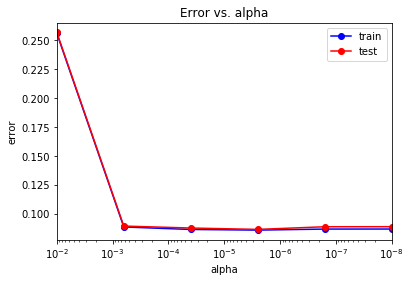

In [32]:
plt.semilogx(alpha_arr, train_err_alpha, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err_alpha, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [94]:
import time
from sklearn.neural_network import MLPClassifier
alpha_arr = np.logspace(-8, -2, 7)
neurons_arr = [
    (10,), (20,), (50,), (100,), (200,),
    (10, 10), (20, 10), (100, 10),
    (10, 10, 5), (20, 10, 5), (100, 10, 10)
]
test_err_neurons = []
train_err_neurons = []
best_err2 = 100
best_neurons = None
best_model2 = None
for neurons in neurons_arr:
    start = time.time()
    mlp_model = MLPClassifier(alpha = best_alpha, hidden_layer_sizes = neurons, 
                              solver = 'adam', activation = 'logistic', random_state = 42)
    mlp_model.fit(X1_train, y1_train)

    y_train_pred = mlp_model.predict(X1_train)
    y_test_pred = mlp_model.predict(X1_test)
    
    err_train = np.mean(y1_train != y_train_pred)
    err_test = np.mean(y1_test != y_test_pred)
    train_err_neurons.append(err_train)
    test_err_neurons.append(err_test)
    
    if err_test < best_err2:
        best_neurons = neurons
        best_err2 = err_test
        best_model2 = mlp_model
    print("Done neurons {:<10} time is {:3} errors {:.4} {:.4}".format(str(neurons), round(time.time() - start), err_train, err_test))

Done neurons (10,)      time is   8 errors 0.2631 0.2646
Done neurons (20,)      time is  10 errors 0.261 0.2639
Done neurons (50,)      time is  20 errors 0.2572 0.2616
Done neurons (100,)     time is   2 errors 0.2764 0.2771
Done neurons (200,)     time is   4 errors 0.2815 0.281
Done neurons (10, 10)   time is   5 errors 0.2636 0.265
Done neurons (20, 10)   time is  13 errors 0.2601 0.2625


c:\users\bmz\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Done neurons (100, 10)  time is  57 errors 0.08574 0.08637
Done neurons (10, 10, 5) time is  26 errors 0.08294 0.0881
Done neurons (20, 10, 5) time is  12 errors 0.2606 0.2623
Done neurons (100, 10, 10) time is  57 errors 0.06831 0.07324


In [95]:
print(f"Best neurons {best_neurons} with error {best_err2}")

Best neurons (100, 10, 10) with error 0.07323635368689863


In [96]:
best_model2.score(secret_test.drop(('y'), axis = 1), secret_test['y'])

0.5316091954022989

In [115]:
y_train_pred = best_model2.predict(X1_train)
y_test_pred = best_model2.predict(X1_test)
err_train = np.mean(y1_train != y_train_pred)
err_test = np.mean(y1_test != y_test_pred)
print("Train/test error", err_train, err_test)

print("Train confuse\n", confusion_matrix(y1_train, y_train_pred))
print("Test confuse\n", confusion_matrix(y1_test, y_test_pred))

Train/test error 0.06830574393652158 0.07323635368689863
Train confuse
 [[23498  2029]
 [ 1466 24174]]
Test confuse
 [[10076   945]
 [  661 10247]]


In [118]:
1466 / (1466 + 24174), 661 / (661 + 10247), 1 / 11

(0.05717628705148206, 0.0605977264393106, 0.09090909090909091)

Как мы видим пропорция верно угаданных значений класса `y` возросла. 19 из 20 в тренировочной и тестовой, и больше половины в секретом тесте.

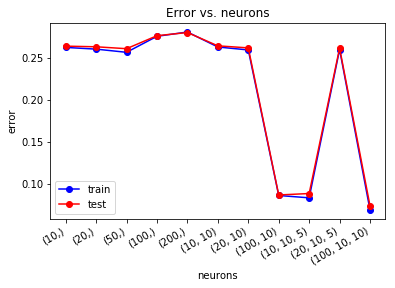

In [97]:
x_neuron = list(range(len(neurons_arr)))
plt.plot(x_neuron, train_err_neurons, 'b-o', label = 'train')
plt.plot(x_neuron, test_err_neurons, 'r-o', label = 'test')
#plt.xlim([np.max(x_neuron), np.min(x_neuron)])
plt.xticks(x_neuron, [str(i) for i in neurons_arr])
plt.gcf().autofmt_xdate()
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()
pass

Попробуем решить все наши проблемы с несбалансированностью классов
с помощью разделения данных на множество датасетов в которых совпадают данные из класса `y`, а данные из класса `n` разные (так как их больше).
На каждом датасете мы обучим одинаковую модель и усредним оценки вроятностей для получения предсказания.

In [98]:
y_data = data_k[data_k['y'] == 1].sample(frac=1.0)
n_data = data_k[data_k['y'] == 0].sample(frac=1.0)

y_len = y_data.shape[0]

test_frac = 0.3
test_len = int(test_frac * y_len)
test_data = pd.concat([y_data.iloc[:test_len], n_data.iloc[:test_len]])
test_data, test_labels = test_data.drop('y', axis=1), test_data['y']

y_data = y_data.iloc[test_len:]
n_data = n_data.iloc[test_len:]

y_len -= test_len
n_len = n_data.shape[0]

steps = n_len // y_len
datasets = [None] * steps

for i in range(steps):
    df = pd.concat([y_data,
                    n_data.iloc[i*y_len:i*y_len + y_len]])
    datasets[i] = df.drop('y', axis=1), df['y']

print(y_len, steps)

3248 10


In [99]:
class ensemble:
    def __init__(self, models):
        self.models = models
        self.n = len(models)
        
    def call_all(self, f, args):
        return [getattr(m, f)(*arg)\
                for m, arg in zip(self.models, args)]

    def predict(self,x):
        return np.array(self.call_all('predict_proba', [x]*self.n))\
                 .mean(axis = 0).argmax(axis = 1)


In [100]:
models = []
for i in range(steps):
    model = MLPClassifier(alpha = best_alpha,
                          hidden_layer_sizes = best_neurons, 
                          solver = 'adam',
                          activation = 'logistic',
                          random_state = 42)
    models.append(model)
model_ens = ensemble(models)

In [101]:
model_ens.call_all('fit', datasets);

In [103]:
prediction = model_ens.predict([test_data])

In [104]:
np.mean(test_labels == prediction)

0.7094109195402298

In [122]:
all_train_data = pd.concat([d[0] for d in datasets])
all_train_labels = pd.concat([d[1] for d in datasets])

y_train_pred = model_ens.predict([all_train_data])
y_test_pred = prediction
err_train = np.mean(all_train_labels != y_train_pred)
print("Train error", err_train)

print("Train confuse\n", confusion_matrix(all_train_labels, y_train_pred))
print("Test confuse\n", confusion_matrix(test_labels, y_test_pred))

Train error 0.26758004926108375
Train confuse
 [[26158  6322]
 [11060 21420]]
Test confuse
 [[1116  276]
 [ 533  859]]


In [125]:
859 / (533 + 859)

0.6170977011494253

У ансамбля мы видим другую картину. 
Теперь ошибка на тренировочной выборке почти такая же как и на тестовой (0.26 vs 0.29 значит недообучение).
Кстати такую же ошибку показывали наши наихудшие модели.
Зато ошибка на тренировочной ошибке лучше всех. Хотя и не намного так как если считать ошибку только на классе `y` выходит всё ещё чуть лучше рандома.

# $k$NN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
ans = work(data_s, KNeighborsClassifier, n_neighbors=10)

KNeighborsClassifier result error is 0.09514064722000624 0.10423241887189447


In [52]:
from sklearn.neighbors import KNeighborsClassifier
ans = work(data_r, KNeighborsClassifier, n_neighbors=5)

KNeighborsClassifier result error is 0.12158226982234643 0.1671302840986821


In [54]:
ans[0].score(secret_test.drop(('y'), axis = 1), secret_test['y'])

0.5301724137931034

### Подбор параметров

In [ ]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

In [ ]:
ans = work(data_s, KNeighborsClassifier, n_neighbors=best_n_neighbors)

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, ans[1][1]))

Как мы видим результат алгоритма слабо отличается от нашей оценки.
0.112 против 0.103.
Как мы видим из `confusion matrix` большая часть ошибок - ложноотрицательные.

# SVC

In [ ]:
from sklearn.svm import SVC
ans = work(data_s, SVC)

### Подбор параметров

In [ ]:
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
#grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array}, n_jobs=-1)
grid = GridSearchCV(svc, param_grid = {'C': Cs}, n_jobs=-1)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

In [ ]:
ans = work(data_s, SVC, C = best_C)

# Random Forest

In [ ]:
from sklearn import ensemble
ans = work(data_s, ensemble.RandomForestClassifier, n_estimators = 1000)

In [ ]:
from sklearn import ensemble
ans = work(data_r, ensemble.RandomForestClassifier, n_estimators = 1000)

In [ ]:
print(secret_test_size, (1 - 0.00013680514387340965) ** secret_test_size)
ans[0].score(secret_test.drop(('y'), axis = 1), secret_test['y'])

### Значимость признаков

In [ ]:
rf = ans[0]
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(len(indices)):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

In [ ]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

# Extremely Randomized Trees

In [ ]:
ans = work(data_s, ensemble.ExtraTreesClassifier, n_estimators = 100)

# AdaBoost

In [ ]:
ans = work(data_s, ensemble.AdaBoostClassifier, n_estimators = 100)

# GBT

In [ ]:
ans = work(data_s, ensemble.GradientBoostingClassifier, n_estimators = 100)

## Дополнительный тест

Если мы не будем убирать `duration` то результаты немного улучшаться

Если же не делать других вещей, то они ухудшаться совсем немного.

In [ ]:
def generate(conditions):
    enable_duration, clean_correlation, clean_unknown, clean_dates = conditions
    data_clear = pd.read_csv('bank-additional-full.csv', sep = ';', engine = 'python')

    if not enable_duration:
        data_clear = data_clear.drop(['duration'], axis = 1)
        
    if clean_correlation:
        data_clear = data_clear.drop(['euribor3m', 'nr.employed'], axis = 1)
        
    if clean_unknown:
        for name in ['job', 'education', 'marital', 'housing', 'loan']:
            data_clear.loc[data_clear[name] == 'unknown', name] = data_clear[name].describe().top
        data_clear = data_clear.drop(['default'], axis=1)
        
    if clean_dates:
        drops = ['month', 'day_of']
        drop_columns = [a for a in data_clear.columns if ('month' in a or 'day_of' in a)]
        data_clear = data_clear.drop(drop_columns, axis=1)

    categorical_columns = [c for c in data_clear.columns if data_clear[c].dtype.name == 'object']
    numerical_columns   = [c for c in data_clear.columns if data_clear[c].dtype.name != 'object']

    data_describe = data_clear.describe(include = [object])
    binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
    nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

    for name in binary_columns:
        A, B = data_clear[name].unique()
        data_clear.at[data_clear[name] == A, name] = 0
        data_clear.at[data_clear[name] == B, name] = 1

    data_nonbinary = pd.get_dummies(data_clear[nonbinary_columns])

    data_numerical = data_clear[numerical_columns]
    data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

    data_cleaned = pd.concat((data_numerical, data_nonbinary, data_clear[binary_columns]), axis = 1)
    
    return split(data_cleaned)

In [ ]:
data_s2 = generate([True, False, False, False])

In [ ]:
ans = work(data_s2, SVC, C = best_C)

### Попробуем все возможные комбинации!

In [ ]:
data_pack = []
for i in range(16):
    k = np.array([a == '1' for a in bin(i)[2:].zfill(4)])
    data_pack.append((generate(k), k))

In [ ]:
for data, k in data_pack:
    print("K = ", k)
    ans = work(data, KNeighborsClassifier, n_neighbors=10)
    ans = work(data, ensemble.AdaBoostClassifier, n_estimators = 100)
    ans = work(data, SVC, C = best_C)
    print("\n")
    

Вот мы увидели что у нас не получилось значительно улучшить результат